In [1]:
import numpy
import scipy.special
import scipy.misc
import scipy.ndimage
import matplotlib.pyplot
import json, codecs

%matplotlib inline

In [2]:
class neural_network:
        def __init__(self, inputNeuronsCount, hiddenNeuronsCount, outputNeuronsCount, learningRate) :
            self.inputNeuronsCount  = inputNeuronsCount
            self.hiddenNeuronsCount = hiddenNeuronsCount
            self.outputNeuronsCount = outputNeuronsCount
            self.learningRate       = learningRate
           
            self.hiddenLayerWeights = numpy.random.normal(
                0.0, 
                pow(hiddenNeuronsCount, -0.5), 
                (hiddenNeuronsCount, inputNeuronsCount)
            )
            
            self.outputLayerWeights = numpy.random.normal(
                0.0, 
                pow(outputNeuronsCount, -0.5), 
                (outputNeuronsCount, hiddenNeuronsCount)
            )
            
            self.activate = lambda x: scipy.special.expit(x)
            self.activationDerivative = lambda outputMatrix: outputMatrix * (1.0 - outputMatrix) 
            
            pass

        def fit(self, inputs, targetResults) :
     
            inputsSignalsAsMatrix   = numpy.array(inputs, ndmin = 2).T
            targetResultsAsMatrix   = numpy.array(targetResults, ndmin = 2).T
            
            hiddenLayerInSignals    = numpy.dot(self.hiddenLayerWeights, inputsSignalsAsMatrix)
            hiddenLayerOutSignals   = self.activate(hiddenLayerInSignals)
            
            outputLayerInSignals    = numpy.dot(self.outputLayerWeights, hiddenLayerOutSignals)
            outputLayerOutSignals   = self.activate(outputLayerInSignals)
            
            outputLayerErrors       = targetResultsAsMatrix - outputLayerOutSignals
            hiddenLayerErrors       = numpy.dot(self.outputLayerWeights.T, outputLayerErrors)
            
            self.outputLayerWeights += self.learningRate * numpy.dot(
                (outputLayerErrors * self.activationDerivative(outputLayerOutSignals)),
                (numpy.transpose(hiddenLayerOutSignals)))
            
            self.hiddenLayerWeights += self.learningRate * numpy.dot(
                (hiddenLayerErrors * self.activationDerivative(hiddenLayerOutSignals)),
                (numpy.transpose(inputsSignalsAsMatrix)))    
            
            pass
            
        def query(self, inputs) :
            inputsSignalsAsMatrix   =  numpy.array(inputs, ndmin = 2).T
            

            hiddenLayerInSignals    = numpy.dot(self.hiddenLayerWeights, inputsSignalsAsMatrix)
            hiddenLayerOutSignals   = self.activate(hiddenLayerInSignals)
            
            outputLayerInSignals    = numpy.dot(self.outputLayerWeights, hiddenLayerOutSignals)
            outputLayerOutSignals   = self.activate(outputLayerInSignals)
            
            return outputLayerOutSignals
        
        def exportWeights(self):
            hiddenLayerWeightsAsList = self.hiddenLayerWeights.tolist()
            outputLayerWeightsAsList = self.outputLayerWeights.tolist()
            
            json.dump(hiddenLayerWeightsAsList, codecs.open('hiddenLayerWeights.json', 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)
            json.dump(outputLayerWeightsAsList, codecs.open('outputLayerWeights.json', 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)

In [3]:
outputNeuronsCount = 10
possibleOutputLabels = 10

inputNeuronsCount = 28 * 28
hiddenNeuronsCount = 200

learningRate = 0.01
    
neuralNetwork = neural_network(inputNeuronsCount, hiddenNeuronsCount, outputNeuronsCount, learningRate)

In [4]:
def generateImageRotatedBy10Degrees(imageStream):
    imagePlus10 = scipy.ndimage.interpolation.rotate(imageStream.reshape(28,28), 10, cval = 0.01, order = 1, reshape = False)
    imageMinus10 = scipy.ndimage.interpolation.rotate(imageStream.reshape(28,28), -10, cval = 0.01, order = 1, reshape = False)
    return imagePlus10.reshape(784), imageMinus10.reshape(784)

In [5]:
trainingDatasetStream = open("datasets/mnist_train.csv", 'r')
trainingDataset = trainingDatasetStream.readlines()
trainingDatasetStream.close()
epochs = 5
                    
print('Training....')

for epoch in range(epochs):
    for trainingRecord in trainingDataset:
        trainingRecordObject = trainingRecord.split(',')

        neuralNetworkInput = (numpy.asfarray(trainingRecordObject[1:]) / 255.0 * 0.99) + 0.01
        rotatedInputs = generateImageRotatedBy10Degrees(neuralNetworkInput)
        
        desiredNeuralNetworkOutput = numpy.zeros(outputNeuronsCount) + 0.01
        desiredNeuralNetworkOutput[int(trainingRecordObject[0])] = 0.99
        
        neuralNetwork.fit(neuralNetworkInput, desiredNeuralNetworkOutput)
        neuralNetwork.fit(rotatedInputs[0], desiredNeuralNetworkOutput)
        neuralNetwork.fit(rotatedInputs[1], desiredNeuralNetworkOutput)
        pass
    print('Epoch ' + str(epoch) + ' has finished...')
    pass

training....
Epoch 0 has finished...
Epoch 1 has finished...
Epoch 2 has finished...
Epoch 3 has finished...
Epoch 4 has finished...


In [13]:
neuralNetwork.exportWeights()

In [6]:
testDatasetStream = open("datasets/mnist_test.csv", 'r')
testDataset = testDatasetStream.readlines()
testDatasetStream.close()

In [7]:
correctPredictionsCount = 0
predictionsCount = 0

for testRecord in testDataset:
    testRecordObject = testRecord.split(',')

    neuralNetworkInput = (numpy.asfarray(testRecordObject[1:]) / 255.0 * 0.99) + 0.01
    neuralNetworkOutput = neuralNetwork.query(neuralNetworkInput)

    testRecordLabel = int(testRecordObject[0])
    neuralNetworkPrediction = numpy.argmax(neuralNetworkOutput)

    if(neuralNetworkPrediction == testRecordLabel):
        correctPredictionsCount+=1
        
    predictionsCount+=1
    pass

print('accuracy: ', correctPredictionsCount / predictionsCount)

accuracy:  0.9733


In [ ]:
def predictForImage(filename):
    imageFile = scipy.misc.imread(filename, flatten=True)
    
    neuralNetworkInput  = 255.0 - imageFile.reshape(784)
    neuralNetworkInput = (neuralNetworkInput / 255.0 * 0.99) + 0.01


    matplotlib.pyplot.imshow(imageFile)
    print('prediction result: ', numpy.argmax(neuralNetwork.query(neuralNetworkInput)))

prediction result:  5


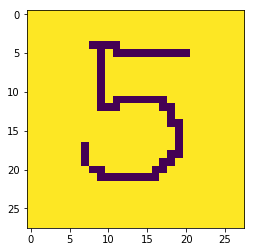

prediction result:  2


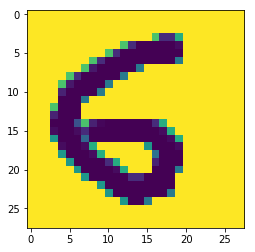

prediction result:  1


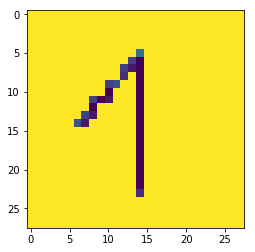

prediction result:  3


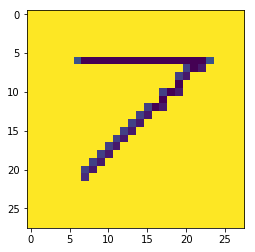